# Financial Data Analytics using Python




## Loading Packages

In [50]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [54]:
#df1 = pd.read_csv("Nat_Gas.csv")
#df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Dates   48 non-null     object 
 1   Prices  48 non-null     float64
dtypes: float64(1), object(1)
memory usage: 896.0+ bytes


## Loading Dataset




In [30]:
df = pd.read_csv("Nat_Gas.csv")

# Convert date format properly (mm/dd/yy)
df['Dates'] = pd.to_datetime(df['Dates'], format='%m/%d/%y')
df = df.sort_values(by='Dates')
df.set_index('Dates', inplace=True)
df.head()

,Prices
Dates,
2020-10-31,10.1
2020-11-30,10.3
2020-12-31,11.0
2021-01-31,10.9
2021-02-28,10.9


## Working With Time Series Data

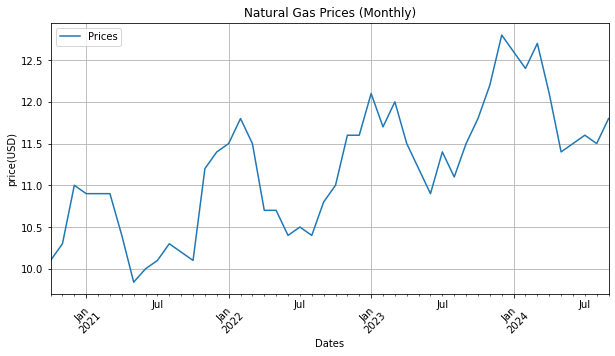

In [37]:
df.plot(title ="Natural Gas Prices (Monthly)", ylabel ="price(USD)" , figsize =(10,5))
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [60]:
# Convert dates to ordinal (number format)
df['DateOrdinal'] = df.index.map(datetime.toordinal)

# Fit Linear Regression
model = LinearRegression()
X = df['DateOrdinal'].to_numpy().reshape(-1, 1)
y = df['Prices'].to_numpy()
model.fit(X, y)

LinearRegression()

# Step 4: Extrapolate 12 months into the future

In [61]:

# Create future dates
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=12, freq='M')
future_ordinals = future_dates.map(datetime.toordinal).to_numpy().reshape(-1, 1)

# Predict future prices
future_prices = model.predict(future_ordinals)


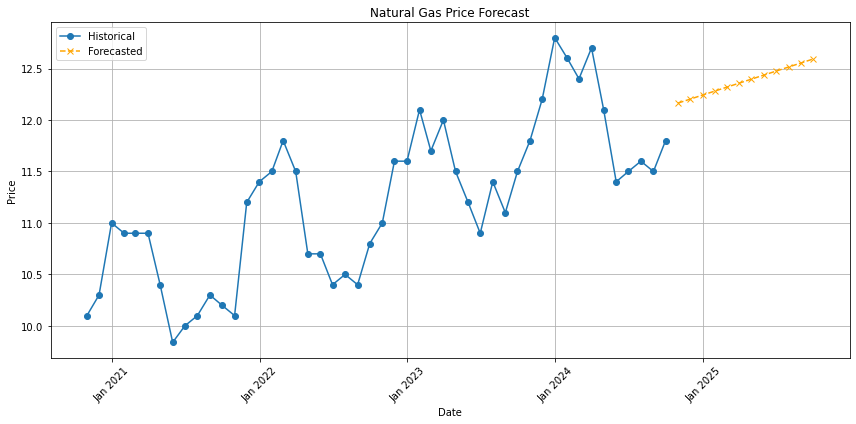

In [66]:

# Step 5: Plot historical + forecasted prices
plt.figure(figsize=(12, 6))
plt.plot(df.index.to_numpy(), df['Prices'].to_numpy(), label='Historical', marker='o')
plt.plot(future_dates.to_numpy(), future_prices, label='Forecasted', linestyle='--', marker='x', color='orange')
plt.title("Natural Gas Price Forecast")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Step 6: Create a function to estimate price for any input date

In [70]:
def estimate_price(input_date):
    input_ordinal = pd.to_datetime(input_date).toordinal()
    predicted_price = model.predict(np.array([[input_ordinal]]))[0]
    return round(predicted_price, 2)

# Example usage

In [71]:
example_date = "2025-07-31"
print(f"Estimated price for {example_date}: {estimate_price(example_date)}")

Estimated price for 2025-07-31: 12.51


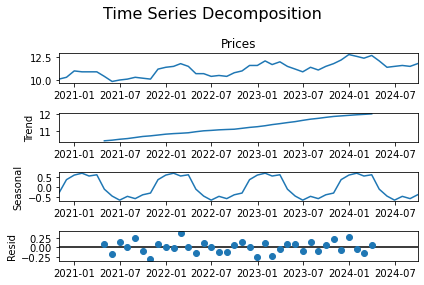

In [73]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose (assumes monthly data, so period=12)
result = seasonal_decompose(df['Prices'], model='additive', period=12)

# Plot the decomposed components
result.plot()
plt.suptitle("Time Series Decomposition", fontsize=16)
plt.tight_layout()
plt.show()
